## 3D Houses - Plot a single shape file

Import the necessary libraries

In [1]:
import os
import sys

In [2]:
sys.executable

'C:\\Users\\ecebo\\anaconda3\\envs\\houses_3d\\python.exe'

In [3]:
import rasterio
import fiona
import geopandas
import gdal

import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from rasterio.plot import show

In [5]:
import numpy as np

Dataset path

In [6]:
data_main_folder_path = os.path.abspath("./data/")

selected_DTM_folder_name = 'DHMVIIDTMRAS1m_k01'
selected_DSM_folder_name = 'DHMVIIDSMRAS1m_k01'

DHM_folder_name = 'DHMVII_vdc_k01'
GeoTIFF_folder_name = 'GeoTIFF'

In [7]:
# DSM TIFF file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, GeoTIFF_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[0]
file_path = os.path.join(folder_path, file_name)

In [8]:
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\GeoTIFF\\DHMVIIDSMRAS1m_k01.tif'

In [ ]:
img = rasterio.open(file_path)
rasterio.plot.show(img)

In [ ]:
print(img.count)
print(img.height, img.width)
print(img.crs)

In [ ]:
img.bounds

In [ ]:
help(img.crs.get)

In [ ]:
img.crs.wkt

In [ ]:
img.transform

In [ ]:
transform_array = np.array([[img.transform.a,img.transform.b,img.transform.c],[img.transform.d,img.transform.e,img.transform.f],[img.transform.g,img.transform.h,img.transform.i]])
transform_array

In [ ]:
print(rasterio.transform.TransformMethodsMixin.index(img, 145000.0, 247000.0)) # left top
print(rasterio.transform.TransformMethodsMixin.index(img, 145000.0, 238000.0)) # left bottom
print(rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 247000.0)) # right top
print(rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 238000.0)) # right bottom
print('\n')
print(rasterio.transform.TransformMethodsMixin.index(img, 150000.0, 244000.0))

In [ ]:
print(img.nodatavals)
img.nodata

In [ ]:
img.bounds

In [ ]:
mask = img.read_masks(1)

In [ ]:
print(img.colormap)

In [ ]:
plt.imshow(mask)
plt.show()

In [ ]:
layer = img.read(1)

In [ ]:
layer.shape

In [ ]:
layer

In [ ]:
plt.hist(layer)
plt.show()

In [ ]:
plt.imshow(layer)
plt.show()

In [ ]:
# Import manually the coordinates of Essen church and boundaries
info_building = {'LocationResult': [{'Municipality': 'Essen',
   'Zipcode': '2910',
   'Thoroughfarename': 'Hofstraat',
   'Housenumber': '37',
   'ID': 1184174,
   'FormattedAddress': 'Hofstraat 37, 2910 Essen',
   'Location': {'Lat_WGS84': 51.46405775720151,
    'Lon_WGS84': 4.466173828750341,
    'X_Lambert72': 156770.24,
    'Y_Lambert72': 239386.62},
   'LocationType': 'crab_huisnummer_afgeleidVanGebouw',
   'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.46405775720151,
     'Lon_WGS84': 4.466173828750341,
     'X_Lambert72': 156770.24,
     'Y_Lambert72': 239386.62},
    'UpperRight': {'Lat_WGS84': 51.46405775720151,
     'Lon_WGS84': 4.466173828750341,
     'X_Lambert72': 156770.24,
     'Y_Lambert72': 239386.62}}}]}
poly_building = [[156756.23355191946, 239387.70288807154],
 [156761.3869599253, 239376.37066406384],
 [156767.87143993378, 239379.28983206674],
 [156768.62420792878, 239377.63709606603],
 [156770.79508793354, 239376.7989520654],
 [156773.09806393832, 239377.96093606576],
 [156773.7593119368, 239379.8987280652],
 [156772.9146399349, 239381.6417040676],
 [156783.99508794397, 239386.78576807305],
 [156778.73275193572, 239398.19453607872],
 [156771.1684639305, 239394.66288807616],
 [156771.95361593366, 239393.34615207464],
 [156764.3418399319, 239389.92445607483],
 [156763.67150393128, 239391.2441360727],
 [156756.23355191946, 239387.70288807154]]

In [ ]:
x_poly_building = [x[0] for x in poly_building]
y_poly_building = [x[1] for x in poly_building]

x_left = min(x_poly_building)
x_right = max(x_poly_building) 
y_bottom = min(y_poly_building)
y_top = max(y_poly_building)

(x_left, x_right, y_bottom, y_top)

In [ ]:
print(info_building['LocationResult'][0]['BoundingBox']['LowerLeft']['X_Lambert72'])
print(info_building['LocationResult'][0]['BoundingBox']['LowerLeft']['Y_Lambert72'])
print(info_building['LocationResult'][0]['BoundingBox']['UpperRight']['X_Lambert72'])
print(info_building['LocationResult'][0]['BoundingBox']['UpperRight']['Y_Lambert72'])

In [ ]:
# Coordinates from Google maps & https://epsg.io/
x_google = 156007.69
y_google = 239149.63

ind_row_google, ind_col_google = rasterio.transform.TransformMethodsMixin.index(img, x_google, y_google)
ind_row_google, ind_col_google

In [ ]:
ind_row_start, ind_col_start = rasterio.transform.TransformMethodsMixin.index(img, x_left, y_top) # left top
ind_row_stop = rasterio.transform.TransformMethodsMixin.index(img, x_left, y_bottom)[0] # left bottom
ind_col_stop = rasterio.transform.TransformMethodsMixin.index(img, x_right, y_top)[1] # right top
print(rasterio.transform.TransformMethodsMixin.index(img, x_left, y_top)) # left top
print(rasterio.transform.TransformMethodsMixin.index(img, x_left, y_bottom)) # left bottom
print(rasterio.transform.TransformMethodsMixin.index(img, x_right, y_top)) # right top
print(rasterio.transform.TransformMethodsMixin.index(img, x_right, y_bottom)) # right bottom

ind_row_start, ind_row_stop, ind_col_start, ind_col_stop

In [ ]:
# Plot a subset of the layer as a 3D image
layer_slice = layer[7000:7200,11000:11100]
layer_slice = layer[6000:6100, 6010:6105]
layer_slice = layer[ind_row_start-20:ind_row_stop+20, ind_col_start-10:ind_col_stop+10]

nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
#ha.invert_xaxis()
ha.invert_yaxis()
plt.show()

In [ ]:
# Clipping with a polygon


import rasterio
from rasterio import features
import shapely
from shapely.geometry import Point, Polygon

def mask_to_polygons_layer(mask):
    all_polygons = []
    for shape, value in features.shapes(mask.astype(np.int16), mask=(mask >0), transform=rasterio.Affine(1.0, 0, 0, 0, 1.0, 0)):
        return shapely.geometry.shape(shape)
        all_polygons.append(shapely.geometry.shape(shape))

    all_polygons = shapely.geometry.MultiPolygon(all_polygons)
    if not all_polygons.is_valid:
        all_polygons = all_polygons.buffer(0)
        # Sometimes buffer() converts a simple Multipolygon to just a Polygon,
        # need to keep it a Multi throughout
        if all_polygons.type == 'Polygon':
            all_polygons = shapely.geometry.MultiPolygon([all_polygons])
    return all_polygons

polygons = mask_to_polygons_layer(threshold)

In [ ]:
# Plot a subset of the layer as a 3D image
layer_slice = layer[7000:7200,11000:11100]
layer_slice = layer[6000:6100, 6010:6105]
layer_slice = layer[ind_row_google-30:ind_row_google+30, ind_col_google-30:ind_col_google+30]

nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [90]:
map_transform = img.get_transform()
map_transform

[145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0]

In [91]:
map_shape = img.shape
map_shape

(9000, 17000)

In [92]:
xMin = map_transform[0]
yMin = map_transform[3]
xMax = xMin + map_shape[1] / map_transform[1]
yMax = yMin + map_shape[0] / map_transform[5]
xMin, yMin, xMax, yMax

(145000.0, 247000.0, 162000.0, 238000.0)

In [93]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [94]:
rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 238000.0)

(9000, 17000)

In [95]:
layers = img.read()
layers

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [96]:
layers.shape

(1, 9000, 17000)

In [97]:
# DTM TIFF file
folder_path = os.path.join(data_main_folder_path, selected_DTM_folder_name, GeoTIFF_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[0]
file_path = os.path.join(folder_path, file_name)
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDTMRAS1m_k01\\GeoTIFF\\DHMVIIDTMRAS1m_k01.tif'

In [98]:
# Read DSM file
img_DSM = rasterio.open(file_path)


In [99]:
layer_DSM = img_DSM.read(1)

In [100]:
layer.shape

(9000, 17000)

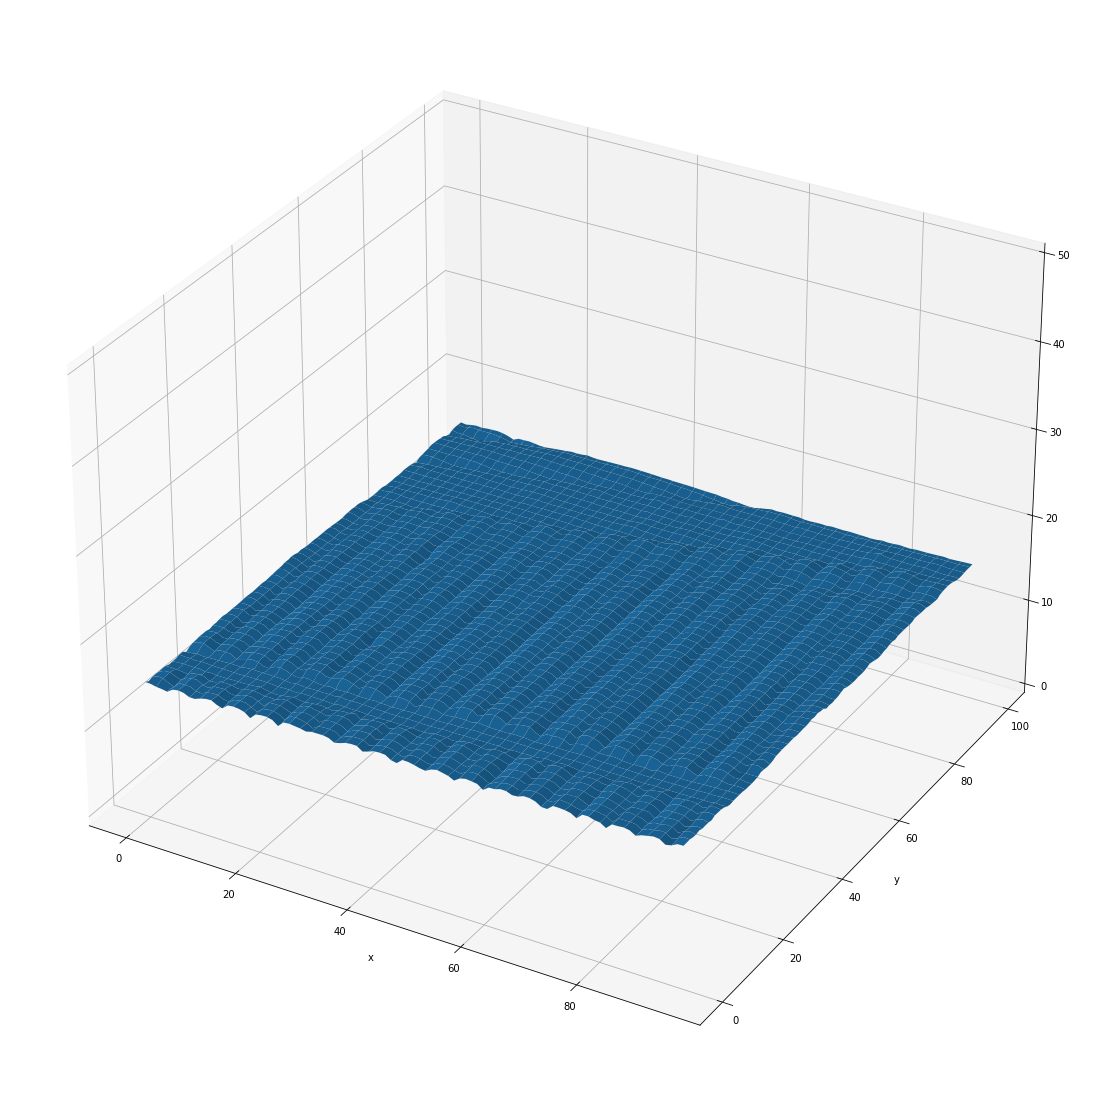

In [101]:
# Plot a subset of the layer as a 3D image
layer_slice = layer_DSM[7000:7200,11000:11100]
layer_slice = layer_DSM[6000:6100, 6010:6105]


nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [102]:
chm = layer-layer_DSM

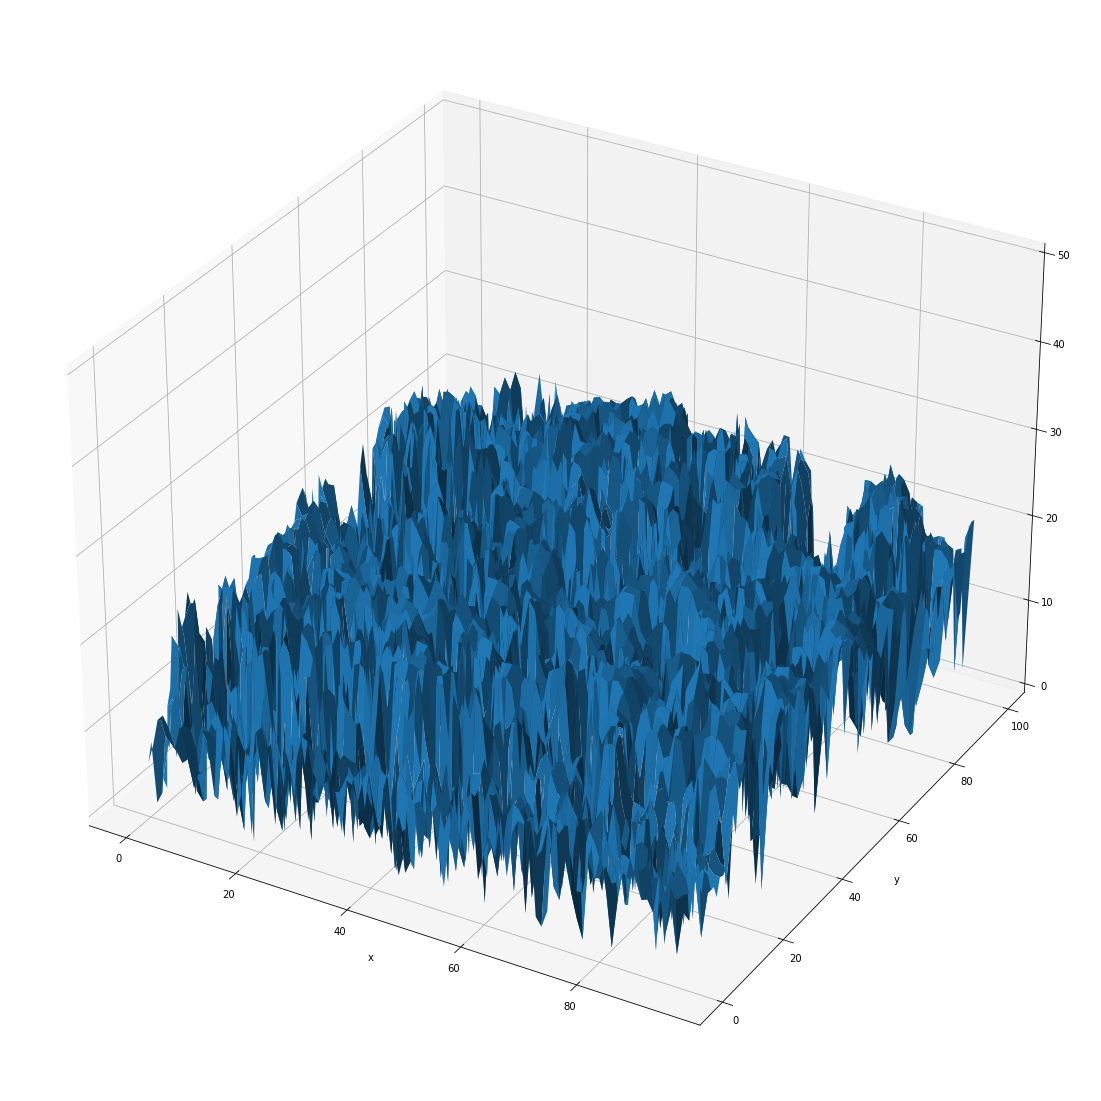

In [103]:
# Plot a subset of the layer as a 3D image
layer_slice = chm[7000:7200,11000:11100]
layer_slice = chm[6000:6100, 6010:6105]


nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

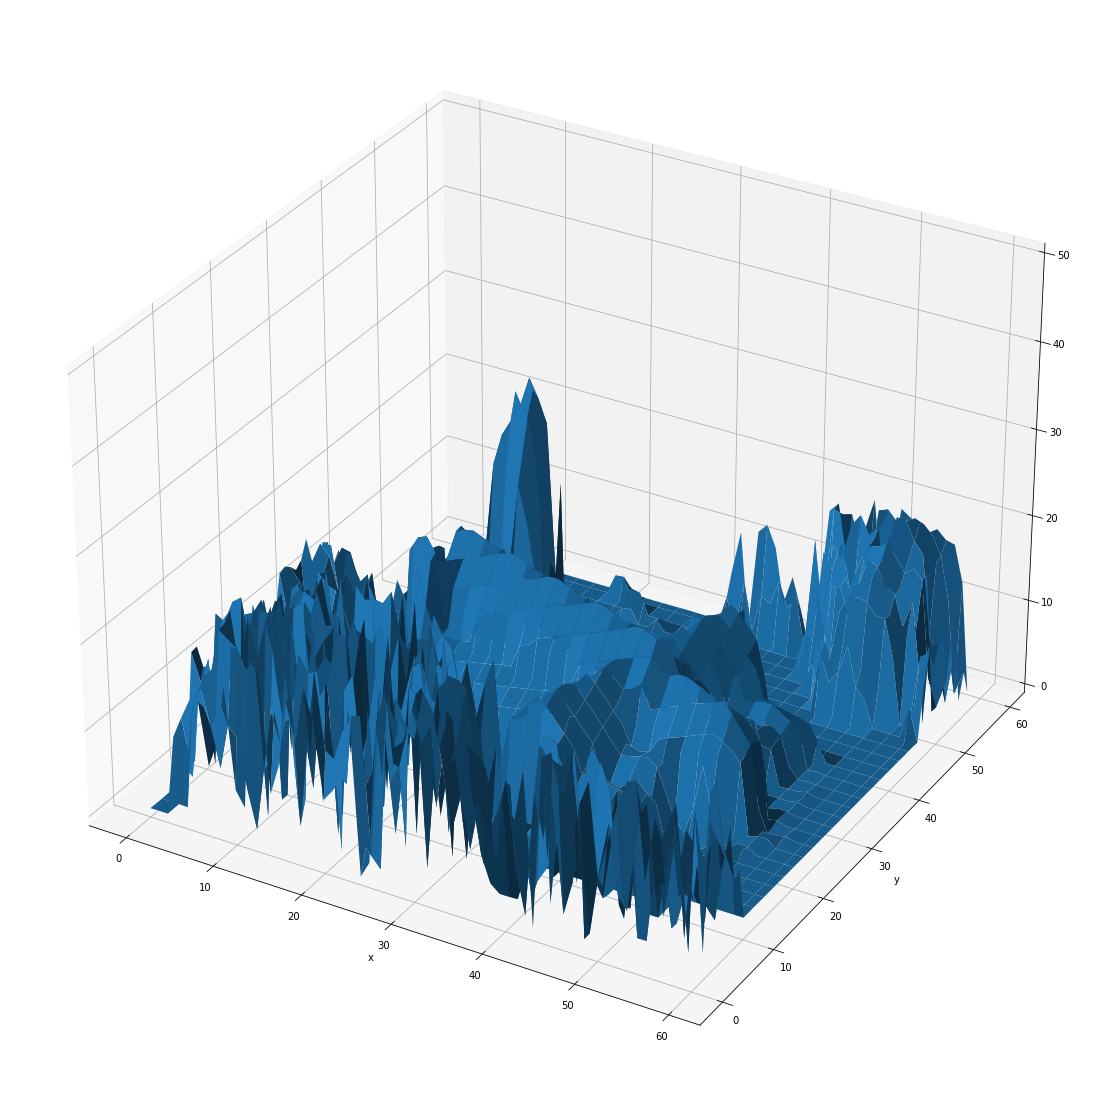

In [104]:
# Plot a subset of the layer as a 3D image
layer_slice = chm[ind_row_google-30:ind_row_google+30, ind_col_google-30:ind_col_google+30]

nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [105]:
# Shape file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, DHM_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[4]
file_path = os.path.join(folder_path, file_name)
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\DHMVII_vdc_k01\\DHMVII_vdc_k01.shp'

In [106]:
# Read shape file
shapes_gp = geopandas.read_file(file_path)
shapes_gp

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


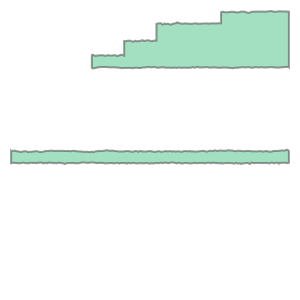

In [107]:
shapes_gp.geometry[0]

In [108]:
help(shapes_gp)

Help on GeoDataFrame in module geopandas.geodataframe object:

class GeoDataFrame(geopandas.base.GeoPandasBase, pandas.core.frame.DataFrame)
 |  GeoDataFrame(*args, geometry=None, crs=None, **kwargs)
 |  
 |  A GeoDataFrame object is a pandas.DataFrame that has a column
 |  with geometry. In addition to the standard DataFrame constructor arguments,
 |  GeoDataFrame also accepts the following keyword arguments:
 |  
 |  Parameters
 |  ----------
 |  crs : value (optional)
 |      Coordinate Reference System of the geometry objects. Can be anything accepted by
 |      :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
 |      such as an authority string (eg "EPSG:4326") or a WKT string.
 |  geometry : str or array (optional)
 |      If str, column to use as geometry. If array, will be set as 'geometry'
 |      column on GeoDataFrame.
 |  
 |  Examples
 |  --------
 |  Constructing GeoDataFrame from a dictionary.
 |  
 |  >>> from shapely.geometry import Point
 |  >>> 

In [109]:
shapes_gp.geometry

0    MULTIPOLYGON Z (((162079.010 238604.770 0.000,...
1    POLYGON Z ((148803.300 243432.780 0.000, 14882...
2    MULTIPOLYGON Z (((156554.470 243736.800 0.000,...
Name: geometry, dtype: geometry

<AxesSubplot:>

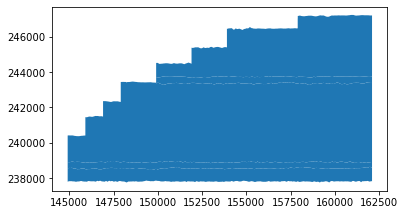

In [56]:
shapes_gp.plot()

In [57]:
shapes_gp

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [61]:
# import rioxarray
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import pandas as pd

# shapefiles
# point_HARV = read_file("data/NEON-DS-Site-Layout-Files/HARV/HARVtower_UTM18N.shp")
# lines_HARV = read_file("data/NEON-DS-Site-Layout-Files/HARV/HARV_roads.shp")
# aoi_boundary_HARV = read_file("data/NEON-DS-Site-Layout-Files/HARV/HarClip_UTMZ18.shp")

# CHM
# CHM_HARV = rioxarray.open("data/NEON-DS-Airborne-Remote-Sensing/HARV/CHM/HARV_chmCrop.tif")

# plot_locations_HARV = pd.read_csv("data/NEON-DS-Site-Layout-Files/HARV/HARV_PlotLocations.csv")
# plot_locations_HARV = gpd.GeoDataFrame(plot_locations_HARV, 
#                     geometry=gpd.points_from_xy(plot_locations_HARV.easting, plot_locations_HARV.northing), 
#                     crs=CHM_HARV.rio.crs) 

ModuleNotFoundError: No module named 'rioxarray'

In [1]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("test.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

ModuleNotFoundError: No module named 'shapefile'